# Exploring PyTorch Tensor

### Short exploration and explanation of PyTorch Tensor function

An short introduction about PyTorch and about the chosen functions. 
- ``torch.logspace``
- ``torch.argmin``
- ``torch.cat``
- ``torch.split``
- ``torch.mean``

In [2]:
# Import torch and other required modules
import torch
import numpy as np
import matplotlib.pyplot as plt

## Function 1 - torch.logspace

The torch.logspace function returns a 1-D tensor of ``steps`` point logarithmically spaced with ``base`` base between base<sup>start</sup> and base<sup>end</sup>.


**Note**: ``torch.linspace`` is a linear spacing and ``torch.logspace`` is logarithmic spacing

In [3]:
# Example 1 - working
torch.logspace(start=-1, end=1, steps=5, dtype=torch.int32)

tensor([ 0,  0,  1,  3, 10], dtype=torch.int32)

This example returns a tensor with 5 integers from 10<sup>-1</sup> to 10<sup>1</sup> with logarithmically spaced. Here, the values are rounded since the desired data type is set to an Integer (torch.int32)

In [4]:
# Example 2 -working
torch.logspace(start=-1, end=1, steps=5, dtype=torch.float64)

tensor([ 0.1000,  0.3162,  1.0000,  3.1623, 10.0000], dtype=torch.float64)

Here, data type is changed to float (torch.float64) and now the points appear to be logarithmically spaced with given ``base``(default 10.0). 

In [5]:
# Example 3 - breaking (to )
x = torch.ones((1,4), dtype=torch.int32)
print(x)
torch.logspace(-1, 1, steps=5, out=x, dtype=torch.float32)

tensor([[1, 1, 1, 1]], dtype=torch.int32)


RuntimeError: dtype Float does not match dtype of out parameter (Int)

The torch.logspace function also has an out parameter which replaces the values of torch.logspace function given the desired tensor.Here we are getting RuntimeError because our **out** parameter is a tensor initialized to store Integers while the resulting tensor from the torch.linspace function is initialized to store Float.

tensor([3.1250e-02, 6.7504e-02, 1.4582e-01, 3.1498e-01, 6.8040e-01, 1.4697e+00,
        3.1748e+00, 6.8580e+00, 1.4814e+01, 3.2000e+01])


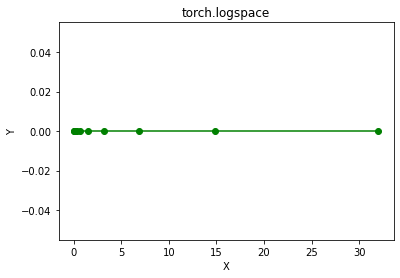

In [6]:
x = torch.logspace(start = -5, end = 5, steps = 10, base = 2)
print(x)

# visualization of torch.logspace
plt.plot(x.numpy(), np.zeros(x.numpy().shape), color='green', marker="o")
plt.title("torch.logspace")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

The figure shows how the values are logarithmically spaced.

This function is useful when you need a 1-D tensor with logarithmically spaced points with base.

## Function 2 - torch.argmin

The torch.argmin function returns the indices of the minimum value of all elements in the ``input`` tensor.

In [7]:
a = torch.randn(1,5)
print(a)
print("Index of minimum value:", torch.argmin(a))

tensor([[-1.0718,  1.5564, -0.8455, -0.4836,  1.8471]])
Index of minimum value: tensor(0)


In this example the torch.argmin function applied to a (1,5) vector. We can see that the minimum value in vector is at index 0 and value at given index is -1.0718

In [8]:
# Example 2 - working
b = torch.randn(3,3)
print(b)
torch.argmin(b, dim=0) # 1-> over row, 0 -> over column

tensor([[-0.7942,  1.2174,  1.6016],
        [ 1.0441,  1.1672,  0.4306],
        [-0.3423, -0.0643, -2.3043]])


tensor([0, 2, 2])

In this example, we are using ``dim`` parameter in torch.argmin function. We can see that our output is a tensor list which contains index of minimum value along the specified dimension 0 (over column).

In [9]:
# Example 3 - breaking (to illustrate when it breaks)
c = [1,2,3,4]
print(c)
torch.argmin(c)

[1, 2, 3, 4]


TypeError: argmin(): argument 'input' (position 1) must be Tensor, not list

Here we can see that providing normal list to a torch.argmin function return a TypeError because the input is a normal list not a Tensor list.

The function should be used when you need to find the position of minimum values in your tensor. It also has capability of finding index of minimum values over different dimension.

Check also: **torch.min()**, **torch.argmax()** 

## Function 3 - torch.cat

The torch.cat function concatenates the given sequence of tensors in the given dimensions.

In [10]:
# Example 1 - working
x = torch.randn(2,2)
print(x)
torch.cat((x,x))

tensor([[-1.5482, -0.2348],
        [-0.3552, -1.3314]])


tensor([[-1.5482, -0.2348],
        [-0.3552, -1.3314],
        [-1.5482, -0.2348],
        [-0.3552, -1.3314]])

We can see that the function torch.cat concatenates the given matrix x over rows (default). 

In [11]:
# Example 2 - working
cat_col = torch.cat((x,x,x), 1) # over column
print(cat_col)

print("---------")

cat_row = torch.cat((x,x,x), 0) # over rows
print(cat_row)

tensor([[-1.5482, -0.2348, -1.5482, -0.2348, -1.5482, -0.2348],
        [-0.3552, -1.3314, -0.3552, -1.3314, -0.3552, -1.3314]])
---------
tensor([[-1.5482, -0.2348],
        [-0.3552, -1.3314],
        [-1.5482, -0.2348],
        [-0.3552, -1.3314],
        [-1.5482, -0.2348],
        [-0.3552, -1.3314]])


We can see that using a dim parameter in torch.cat function concatenates the tensor in different dimensions. Here, cat_col tensor concatenates the tensor over column and cat_row tensor concatenates the tensor over rows.

In [12]:
# Example 3 - breaking (to illustrate when it breaks)
a = torch.randn(2,2)
b = torch.randn(3,3)

print(a)
print(b)

torch.cat((a,b))

tensor([[ 0.2783, -1.5277],
        [-1.2865, -1.1378]])
tensor([[ 0.7400, -0.0190, -0.9407],
        [ 0.6897,  0.8063,  1.1646],
        [-1.4199, -0.5748,  0.0982]])


RuntimeError: Sizes of tensors must match except in dimension 0. Got 2 and 3 in dimension 1

We can see that in this example the torch.cat function is applied to a(2,2) matrix and b(3,3) matrix and we are getting RuntimeError because the dimension of matrix is not matching across column. if we change the dimension of b to (3,2) it will work fine.

> **Note**: All tensors must either have the same shape (except in the concatenating dimension) or be empty

It is useful when we want to concatenate large amount of data in one big matrix for large processing.

## Function 4 - torch.split

The torch.split function splits a longer tensor into smaller tensors.

In [13]:
# Example 1 - working
x = torch.tensor([1,2,3,4,5,6])
torch.split(x, 2)

(tensor([1, 2]), tensor([3, 4]), tensor([5, 6]))

We can see in this example the torch.split function is applied to a tensor vector x which splits the vectors by given size of chunk i.e. 2.

In [14]:
# Example 2 - working
y = torch.randn(4,4)
print(y)
print("-----")
torch.split(y, 2, dim=1) # over column

tensor([[-1.3133,  0.0467, -0.1075,  0.0705],
        [-0.7927,  0.3365, -2.1977,  0.0273],
        [ 0.5852, -0.2618, -0.2891, -0.7143],
        [-1.0531, -0.4570,  0.8493,  0.5974]])
-----


(tensor([[-1.3133,  0.0467],
         [-0.7927,  0.3365],
         [ 0.5852, -0.2618],
         [-1.0531, -0.4570]]), tensor([[-0.1075,  0.0705],
         [-2.1977,  0.0273],
         [-0.2891, -0.7143],
         [ 0.8493,  0.5974]]))

We can see in this example the torch.split function is applied to a matrix of (4,4) with dim parameter set to 1 (over column). It return the two chunks of (4,2) matrix.

In [15]:
# Example 3 - breaking (to illustrate when it breaks)
z = torch.tensor([1,2,3,4,5], dtype=torch.int32)
print(z)
torch.split(z, [3,1])

tensor([1, 2, 3, 4, 5], dtype=torch.int32)


RuntimeError: split_with_sizes expects split_sizes to sum exactly to 5 (input tensor's size at dimension 0), but got split_sizes=[3, 1]

In this example, our tensor z is a integer tensor. Applying the split function to the tensor results in a RuntimeError because the split_size_or_selection paramter is not set correctly. Here split_size_or_selections paramter is a list and this will work only when the sum of values in a list is exaclty equal to length of the given list.

For example: len(z) = 5. therefore split_size_or_selection parameter should be sum exactly 5 i.e., our paramter will have ([3,2], [1,4], [5,0]) values.

Restructuring the input tensors into smaller tensors not only fastens the calculation process, but also helps in distributed computing

## Function 5 - torch.mean

The torch.mean function calculates the mean or average of your tensor.

In [16]:
# Example 1 - working
x = torch.tensor([2,2,2,2], dtype=torch.float32)
print(x)
torch.mean(x)

tensor([2., 2., 2., 2.])


tensor(2.)

We can see in this example the torch.mean function is applied to a tensor value which is just adding all the numbers divded by the length of the tensor.

In [17]:
# Example 2 - working
y = torch.randn((3,3))
print(y)
torch.mean(y, dim=0)

tensor([[-0.9595, -0.2954,  0.1083],
        [ 0.2088,  0.7644,  1.0501],
        [-0.7986, -0.8966, -0.4241]])


tensor([-0.5164, -0.1426,  0.2447])

We can see in this example the torch.mean function is applied to a (3,3) matrix except the dim parameter is set to 0. This is specifying that we want the average over all rows (for each column). We can set dim to 1, if we want the average over all columns (for each row).

In [18]:
# Example 3 - breaking (to illustrate when it breaks)
z = torch.tensor([2,2,2,2])
torch.mean(z)

RuntimeError: Can only calculate the mean of floating types. Got Long instead.

In thi example, our tensor z is a integer data type. Applying the mean function to this integer tensor results in a RuntimeError beacuse you cannot get the mean of integer data types using torch.mean. That is why the RuntimeError syas it can only calculate the mean of floating types.

This function should be use for calculating the mean of your tensor, you can also specify which dimension to calculate the mean.

## Conclusion

In this notebook, we only go over 5 of many different tensor functions that are in PyTorch tensor library. To learn more, you can visit:

[PyTorch Documentation](https://pytorch.org/docs/stable/tensors.html)

## Reference Links
Provide links to your references and other interesting articles about tensors
* Official documentation for `torch.Tensor`: https://pytorch.org/docs/stable/tensors.html